In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
import DataStore

ds = DataStore.DataStore("data", 20)

In [3]:
ds.trainData['A-3'].x[2056]

array([[0.11308108, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [4]:
ds.trainData['A-3'].y[2056]

array([0.54907948, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [23]:
loaded_model = tf.keras.models.load_model('models/experimental/A-1.h5')

In [6]:
loaded_model.layers

In [7]:
ds.testData['A-3'].x[0]

array([[ 0.40241647,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.20466603,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.40241647,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [8]:
ds.testData['A-3'].y[0]

array([-0.58728924,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [32]:
preds = loaded_model.predict(ds.testData['A-3'].x)

In [33]:
preds

array([[[ 0.95155776,  0.87873584,  0.0209483 , ..., -0.378746  ,
          0.08426886,  0.0266314 ]],

       [[ 0.92398787,  0.87357605, -0.00499418, ..., -0.36864382,
          0.0822494 ,  0.00850245]],

       [[ 0.9215885 ,  0.87476915, -0.00931395, ..., -0.37548003,
          0.08244104, -0.00132579]],

       ...,

       [[ 0.9673894 ,  0.7553424 , -0.04317575, ..., -0.4709255 ,
          0.12230108,  0.02914062]],

       [[ 0.98157346,  0.7697498 , -0.04391974, ..., -0.46509585,
          0.12753847,  0.02901387]],

       [[ 0.9856218 ,  0.7743945 , -0.04747659, ..., -0.4755318 ,
          0.11976992,  0.02340288]]], dtype=float32)

In [30]:
y = ds.testData['A-3'].y

In [31]:
from Utils import get_e, rmse, mae, classify_pl, make_discrete_lbls, vectorize_labels
import os



In [34]:
lbls = make_discrete_lbls(os.path.join("data", "labeled_anomalies.csv"))
lbls['A-3']

[(4575, 4760)]

In [35]:
pls = classify_pl(preds, y, 100)

In [36]:
e = []
for i,j in zip(y, preds):
    e.append(rmse(i,j))
e = np.array(e)

In [37]:
lb = vectorize_labels(lbls['A-3'], preds.shape[0])

In [38]:
import matplotlib.pyplot as plt


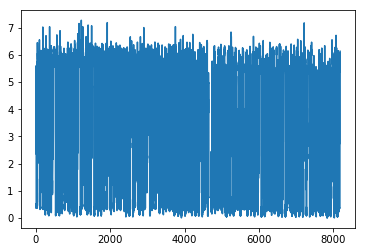

In [39]:
plt.plot(e)

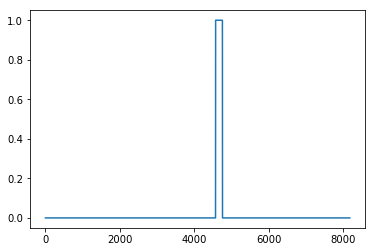

In [40]:
plt.plot(lb)

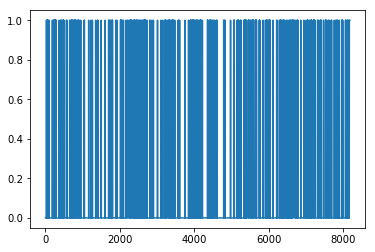

In [44]:
plt.plot(pls)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(lb, pls, target_names=["false", "true"]))

              precision    recall  f1-score   support

       false       0.97      0.88      0.93      8000
        true       0.00      0.02      0.01       185

    accuracy                           0.86      8185
   macro avg       0.49      0.45      0.47      8185
weighted avg       0.95      0.86      0.91      8185



In [60]:
y_true = [0, 0, 0, 0, 0]
y_pred = [1, 1, 0, 1, 1]

In [61]:
target_names = ['false', 'true']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       false       1.00      0.20      0.33         5
        true       0.00      0.00      0.00         0

    accuracy                           0.20         5
   macro avg       0.50      0.10      0.17         5
weighted avg       1.00      0.20      0.33         5



/hpc/applications/anaconda/3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
t = np.ones((100,1))*False

In [ ]:
t[-11:-1]

In [ ]:
for p in preds:
    print(p)